In [39]:
import os
import numpy as np
import torch
import monai
import cv2
from monai.visualize import matshow3d, plot_2d_or_3d_image
from torchvision.utils import save_image

In [40]:
# Load and process the test image

image = 'test_t2w.mha'

load = monai.transforms.Compose([
    monai.transforms.LoadImage(reader='ITKReader', ensure_channel_first=True,image_only=True), 
    monai.transforms.Orientation(axcodes="PLS"),
    monai.transforms.ScaleIntensityRange(a_min=-158.1, a_max=1718, b_min=0.0, b_max=1.0, clip=True),
])

In [41]:
img = load(image)

In [42]:
img.shape

torch.Size([1, 360, 360, 28])

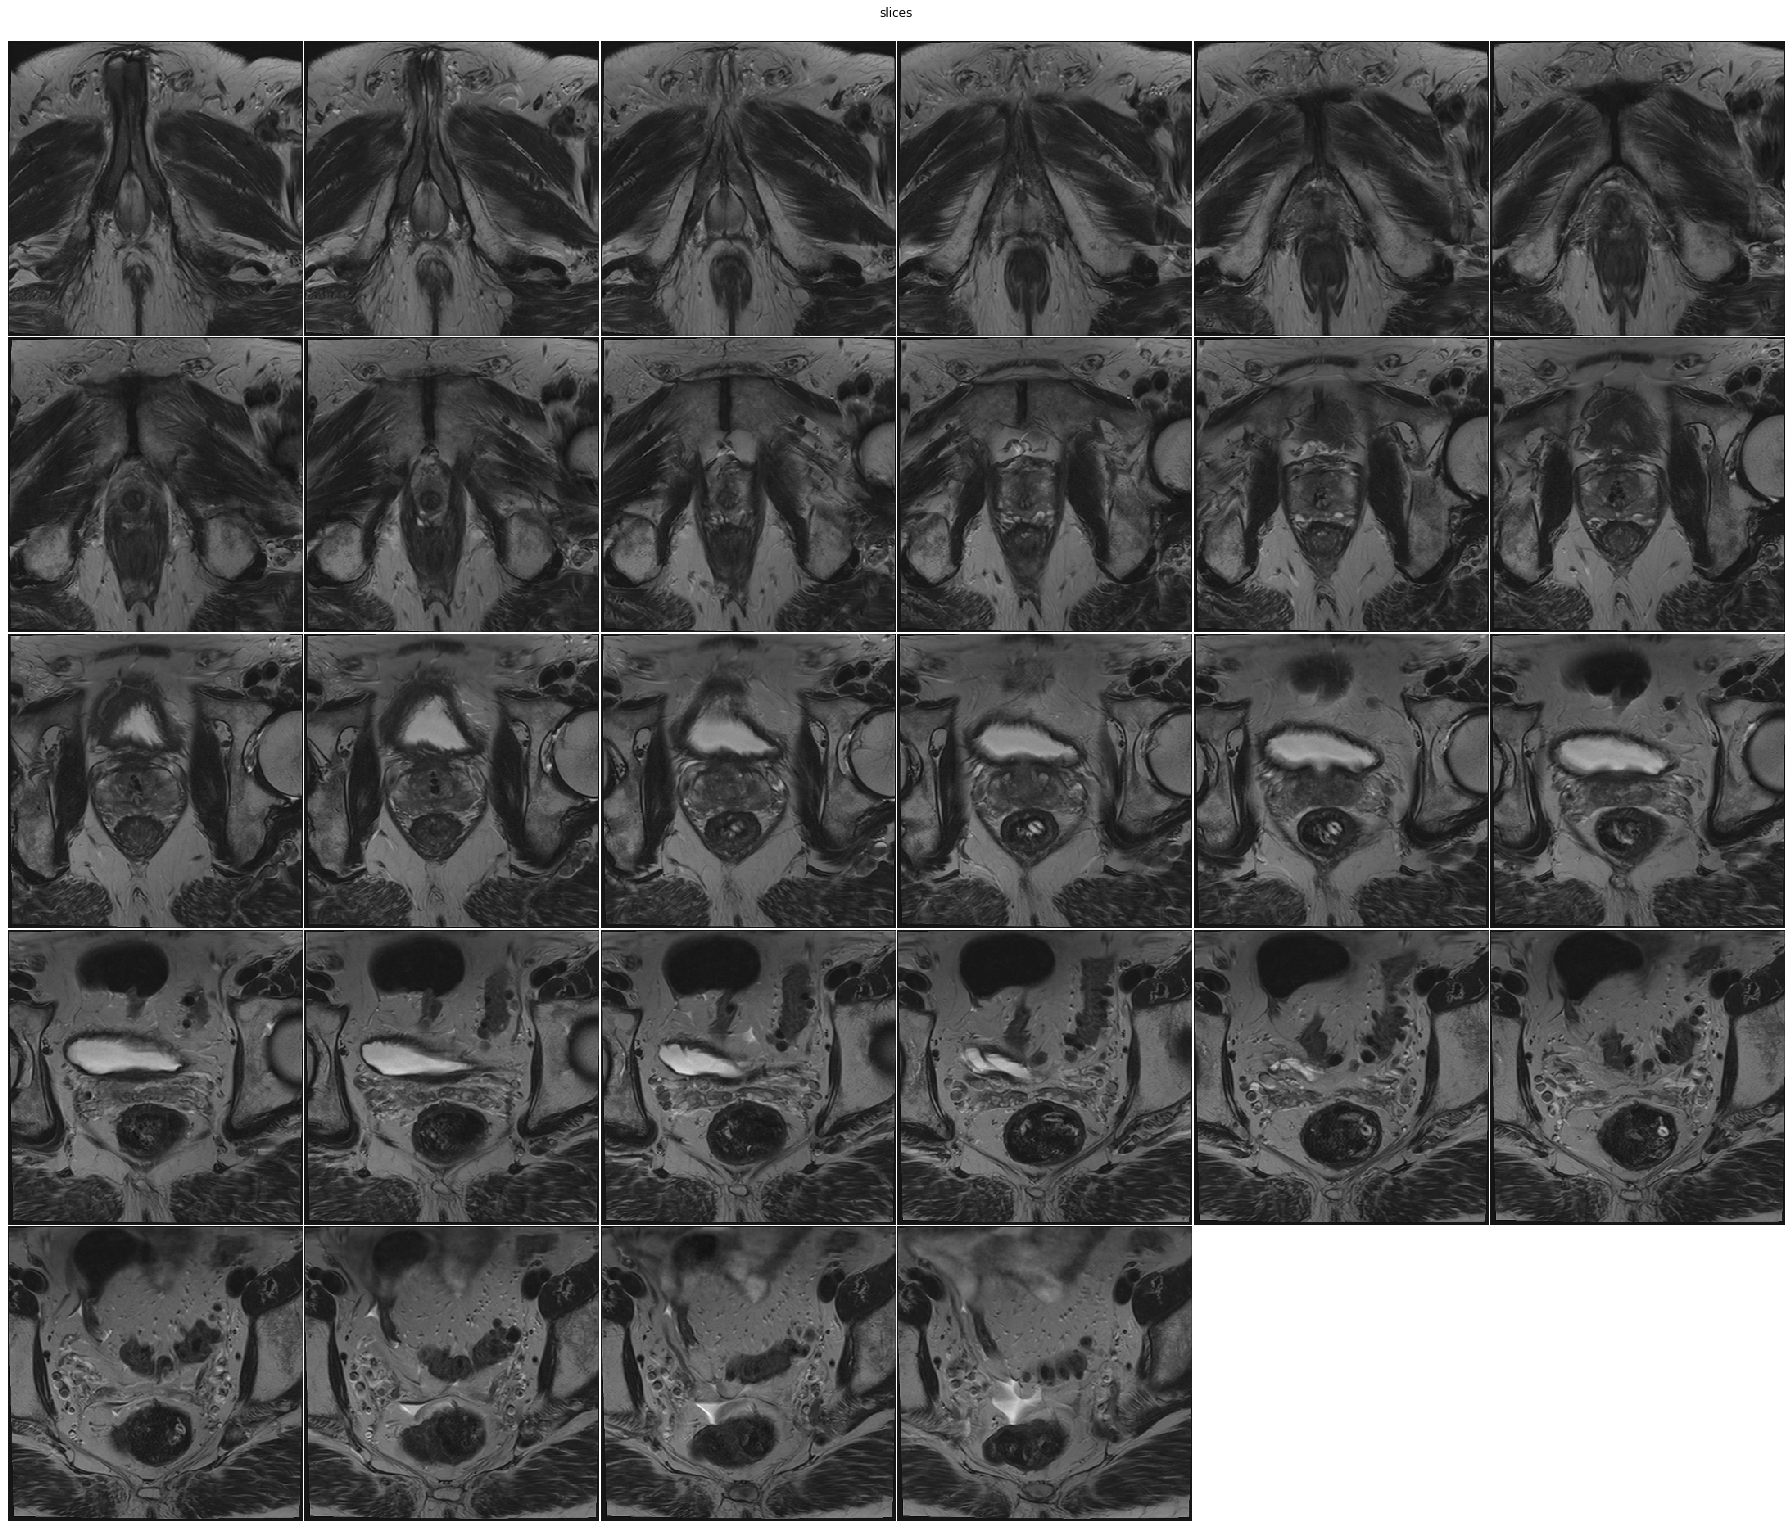

(<Figure size 1800x1800 with 1 Axes>,
 array([[       nan,        nan,        nan, ...,        nan,        nan,
                nan],
        [       nan, 0.08427057, 0.08427057, ..., 0.08427057, 0.08427057,
                nan],
        [       nan, 0.08427057, 0.08427057, ..., 0.08422045, 0.08426446,
                nan],
        ...,
        [       nan, 0.08427057, 0.08427057, ...,        nan,        nan,
                nan],
        [       nan, 0.08427057, 0.08427057, ...,        nan,        nan,
                nan],
        [       nan,        nan,        nan, ...,        nan,        nan,
                nan]], dtype=float32))

In [32]:
# plot the slices ot ensure everything looks ok

matshow3d(
    volume=img,
    fig=None, title="slices",
    figsize=(25, 25),
    #every_n=10,
    frame_dim=-1,
    show=True,
    cmap="gray",
)

In [43]:
# iterate and save the slices

os.mkdir('slices')

for i in range(img.shape[-1]):
    save_image(img[0, :, :, i], "slices/slice_"+str(i)+".png")

In [46]:
# call SIFT and compute the keypoints

img = cv2.imread('slices/slice_13.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)

# generate and save the image with the keypopints
img_kp=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite('sift_keypoints.jpg',img_kp)

True